In [1]:
from sklearn.datasets import fetch_openml

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import tree

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import model_selection

from sklearn import dummy

from sklearn import ensemble

import graphviz

import optuna

from sklearn import pipeline
from sklearn import preprocessing

In [2]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True, parser='auto')

In [3]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [4]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


In [6]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
0.9167 * 12 # age is given in years

11.000399999999999

In [8]:
(
    X
    .assign(
        body_found = ~X['body'].isna(),
        was_in_a_boat = ~X['boat'].isna(),
        survived = y,
    )
    [['body_found', 'was_in_a_boat', 'survived']]
).corr() # ['survived']

,body_found,was_in_a_boat,survived
body_found,1.000000,-0.245246,-0.250897
was_in_a_boat,-0.245246,1.000000,0.948190
survived,-0.250897,0.948190,1.000000


In [9]:
X.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

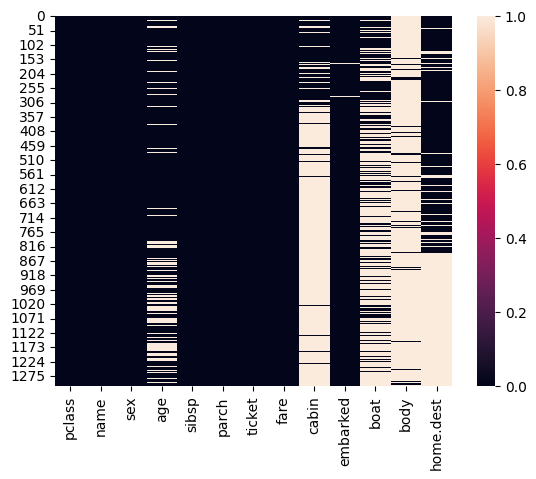

In [10]:
sns.heatmap(X.isna());

In [11]:
df = (
    X
    .assign(
        sex_code=lambda d: d.sex.cat.codes,
        embarked_code=lambda d: d.embarked.cat.codes,
    )
    .assign(
        fare=lambda d: d.fare.fillna(method='ffill'),
        age=lambda d: d.age.fillna(method='ffill'),
    )
    .drop(['name', 'sex', 'embarked', 'cabin', 'ticket', 'boat', 'home.dest', 'body'], axis=1)
)

In [12]:
lr = linear_model.LogisticRegression()

In [13]:
lr.fit(df, y)

LogisticRegression()

In [14]:
lr.score(df, y)

0.7891520244461421

In [15]:
accuracy_score(y, lr.predict(df))

0.7891520244461421

In [16]:
confusion_matrix(y, lr.predict(df))

array([[689, 120],
       [156, 344]])

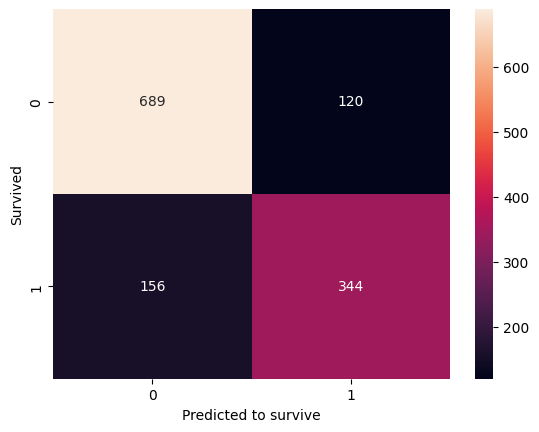

In [17]:
sns.heatmap(confusion_matrix(y, lr.predict(df)), annot=True, fmt="d")
plt.ylabel("Survived")
plt.xlabel("Predicted to survive")
plt.show()

In [18]:
y.value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [19]:
dt = tree.DecisionTreeClassifier()

In [20]:
dt.fit(df, y)

DecisionTreeClassifier()

In [21]:
dt.score(df, y)

0.9770817417876242

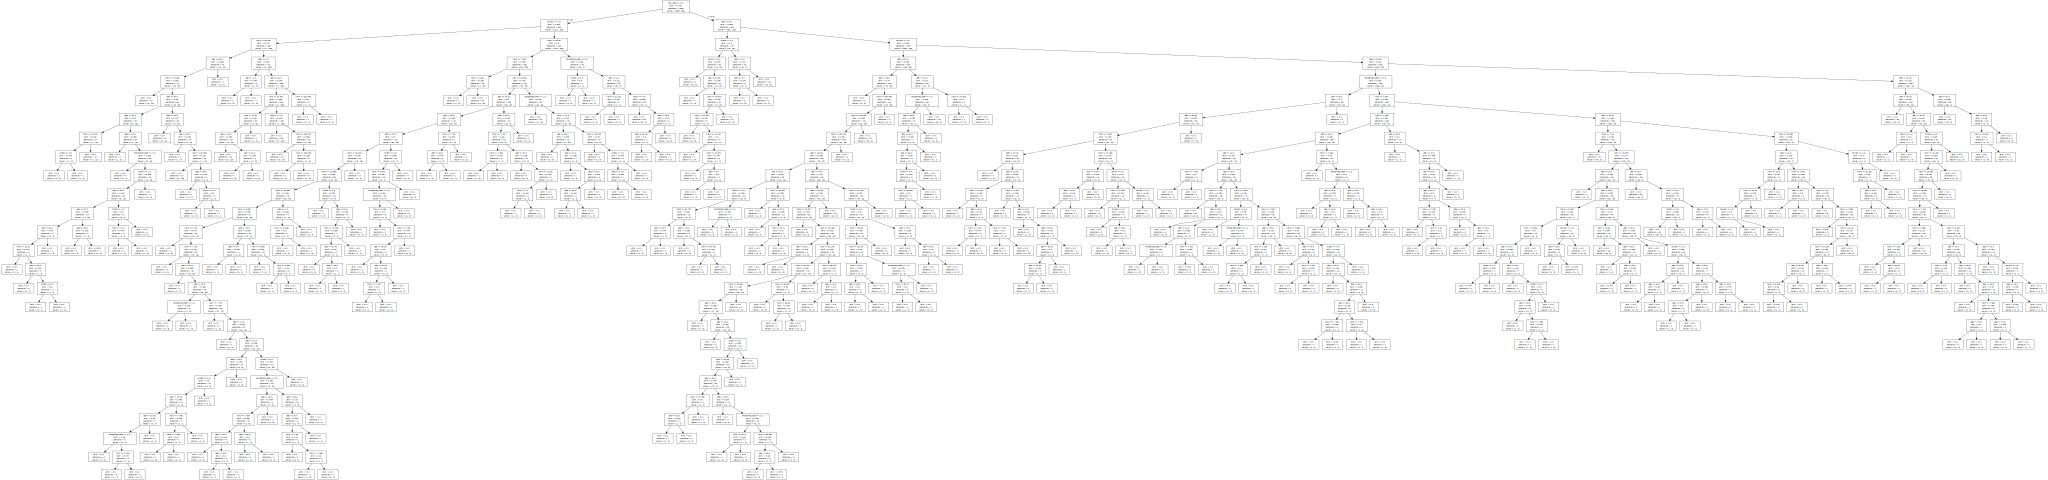

In [22]:
graphviz.Source( tree.export_graphviz(dt, out_file=None, feature_names=df.columns))

In [23]:
model_selection.cross_val_score(dt, df, y)

array([0.48854962, 0.78244275, 0.57251908, 0.66030534, 0.651341  ])

In [24]:
np.array([0.47328244, 0.81679389, 0.61832061, 0.65648855, 0.651341  ]).mean()

0.643245298

In [25]:
model_selection.cross_val_score(lr, df, y)

/home/oren/projects/humans_thoughts/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.53053435, 0.83969466, 0.81679389, 0.73282443, 0.68582375])

In [26]:
np.array([0.53053435, 0.83969466, 0.81679389, 0.73282443, 0.68582375]).mean()

0.721134216

In [27]:
dt2 = tree.DecisionTreeClassifier(max_depth=4)

In [28]:
dt2.fit(df, y)

DecisionTreeClassifier(max_depth=4)

In [29]:
model_selection.cross_val_score(dt2, df, y).mean()

0.673759176391448

In [30]:
def plot_feature_importance(lr, df=df):
    summary_lr = (
        pd.DataFrame({
            'coef': lr.coef_[0],
            'feature': df.columns
        })
        .sort_values('coef', ascending=False)
    )

    plt.barh(summary_lr['feature'], summary_lr['coef']);

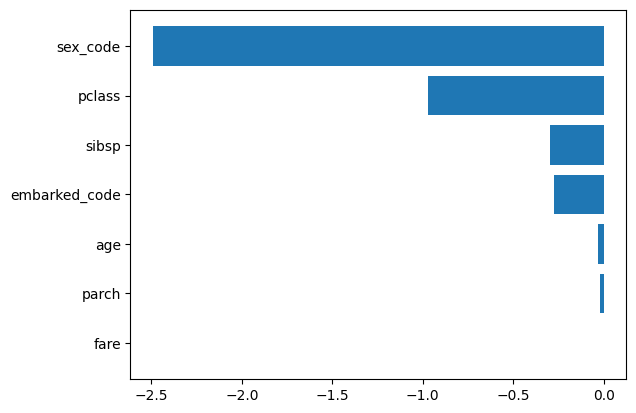

In [31]:
plot_feature_importance(lr)

In [32]:
dm = dummy.DummyClassifier()

In [33]:
dm.fit(df, y)

DummyClassifier()

In [34]:
dm.score(df, y)

0.6180290297937356

In [35]:
model_selection.cross_val_score(dm, df, y).mean()

0.6180281360591968

In [36]:
lr_pipe = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(),
)

In [37]:
model_selection.cross_val_score(lr_pipe, df, y).mean()

0.7173174227135796

In [38]:
lr_pipe.fit(df, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

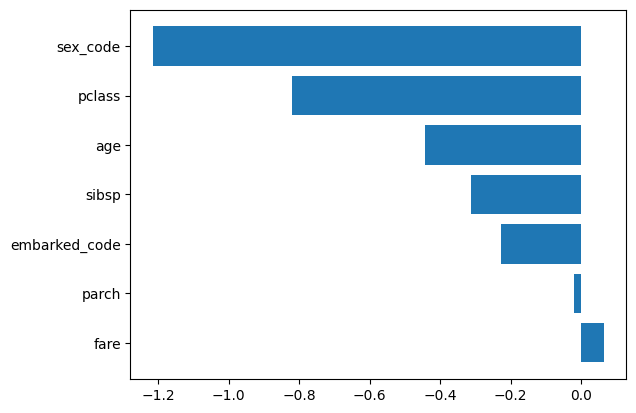

In [39]:
plot_feature_importance(lr_pipe.steps[-1][1])

In [40]:
pd.get_dummies(X, columns=['pclass'])

,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,pclass_1,pclass_2,pclass_3
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",True,False,False
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",True,False,False
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",True,False,False
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,False,False,True
1305,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,False,False,True
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,False,False,True
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,False,False,True


In [41]:
df_for_lr = (
    pd.get_dummies(X, columns=['embarked'])
    .assign(
        sex_code=lambda d: d.sex.cat.codes,
    #     embarked_code=lambda d: d.embarked.cat.codes,
    )
    .assign(
        fare=lambda d: d.fare.fillna(method='ffill'),
        age=lambda d: d.age.fillna(method='ffill'),
    )
    .drop(['name', 'sex', 'cabin', 'ticket', 'boat', 'home.dest', 'body'], axis=1)
)

In [42]:
df_for_lr.head()

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_code
0,1,29.0000,0,0,211.3375,False,False,True,0
1,1,0.9167,1,2,151.5500,False,False,True,1
2,1,2.0000,1,2,151.5500,False,False,True,0
3,1,30.0000,1,2,151.5500,False,False,True,1
4,1,25.0000,1,2,151.5500,False,False,True,0


In [43]:
lr2 = linear_model.LogisticRegression(max_iter=1000)

In [44]:
lr2.fit(df_for_lr, y)

LogisticRegression(max_iter=1000)

In [45]:
model_selection.cross_val_score(lr2, df_for_lr, y).mean()

0.7180690825070926

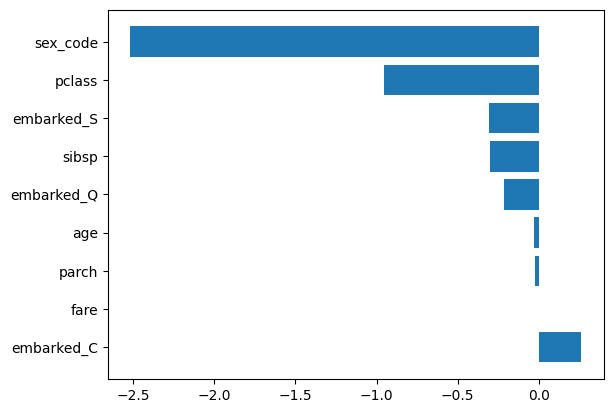

In [46]:
plot_feature_importance(lr2, df=df_for_lr)

In [47]:
def sigmoid(x):
    return np.exp(x) / (np.exp(x) + 1)

In [48]:
sigmoid(-2)

0.11920292202211755

In [49]:
sigmoid(2)

0.8807970779778824

In [50]:
sigmoid(-1)

0.2689414213699951

In [51]:
sigmoid(0)

0.5

In [52]:
x = np.linspace(-3, 3)

In [53]:
x

array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

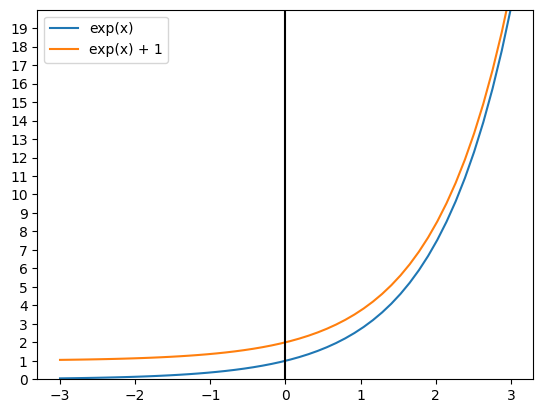

In [54]:
plt.plot(x, np.exp(x), label="exp(x)")
plt.plot(x, np.exp(x) + 1, label="exp(x) + 1")
plt.axvline(0, color='black')
plt.yticks(range(0, 20))
plt.ylim(0, 20)
plt.legend();

In [55]:
rf = ensemble.RandomForestClassifier(min_samples_split=20, n_estimators=500)

In [56]:
model_selection.cross_val_score(rf, df, y).mean()

0.6760521774736041

In [74]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 40)

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    
    rf = ensemble.RandomForestClassifier(min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=1, criterion=criterion)
    return model_selection.cross_val_score(rf, df, y).mean()

In [79]:
study = optuna.create_study(study_name="rf_study", direction="maximize")

[I 2023-07-22 21:01:12,843] A new study created in memory with name: rf_study


In [80]:
study.optimize(objective, n_trials=100)

[I 2023-07-22 21:01:13,684] Trial 0 finished with value: 0.6729987423591004 and parameters: {'n_estimators': 11, 'min_samples_split': 37, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.6729987423591004.
[I 2023-07-22 21:01:13,825] Trial 1 finished with value: 0.6966628644965049 and parameters: {'n_estimators': 24, 'min_samples_split': 38, 'criterion': 'gini'}. Best is trial 1 with value: 0.6966628644965049.
[I 2023-07-22 21:01:14,288] Trial 2 finished with value: 0.6791143868269428 and parameters: {'n_estimators': 81, 'min_samples_split': 17, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.6966628644965049.
[I 2023-07-22 21:01:14,575] Trial 3 finished with value: 0.6844666725161593 and parameters: {'n_estimators': 53, 'min_samples_split': 28, 'criterion': 'gini'}. Best is trial 1 with value: 0.6966628644965049.
[I 2023-07-22 21:01:15,049] Trial 4 finished with value: 0.6753005176800914 and parameters: {'n_estimators': 81, 'min_samples_split': 12, 'criterion': 'log_loss

In [81]:
study.best_params

{'n_estimators': 25, 'min_samples_split': 33, 'criterion': 'gini'}

In [82]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_min_samples_split,params_n_estimators,state
0,0,0.672999,2023-07-22 21:01:13.595265,2023-07-22 21:01:13.684227,0 days 00:00:00.088962,log_loss,37,11,COMPLETE
1,1,0.696663,2023-07-22 21:01:13.684868,2023-07-22 21:01:13.825527,0 days 00:00:00.140659,gini,38,24,COMPLETE
2,2,0.679114,2023-07-22 21:01:13.826279,2023-07-22 21:01:14.288575,0 days 00:00:00.462296,log_loss,17,81,COMPLETE
3,3,0.684467,2023-07-22 21:01:14.289320,2023-07-22 21:01:14.574997,0 days 00:00:00.285677,gini,28,53,COMPLETE
4,4,0.675301,2023-07-22 21:01:14.575725,2023-07-22 21:01:15.049427,0 days 00:00:00.473702,log_loss,12,81,COMPLETE
...,...,...,...,...,...,...,...,...,...
95,95,0.694399,2023-07-22 21:01:34.120345,2023-07-22 21:01:34.286883,0 days 00:00:00.166538,gini,27,26,COMPLETE
96,96,0.697444,2023-07-22 21:01:34.287667,2023-07-22 21:01:34.417199,0 days 00:00:00.129532,gini,33,20,COMPLETE
97,97,0.685230,2023-07-22 21:01:34.417978,2023-07-22 21:01:34.591654,0 days 00:00:00.173676,gini,31,29,COMPLETE
98,98,0.676836,2023-07-22 21:01:34.592402,2023-07-22 21:01:34.758217,0 days 00:00:00.165815,gini,6,24,COMPLETE
